# Tarea #1

# Estudiantes
    John Sánchez Cespedes 2021080092
    Luis Carlos Navarro Todd 2022212158
    Victoria Sandí Barrantes 2022146536

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Análisis Exploratorio de Datos (EDA) y Limpieza
Abrir los datos con pandas:

In [3]:
dataset=pd.read_csv('./house_price_regression_dataset.csv')
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Se puede observar que el dataset se abre de forma correcta.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## Tratar Nulos

In [6]:
dataset.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Como se puede observar, no hay datos nulos en el dataset

## Manejar Outliers

<Axes: xlabel='Square_Footage'>

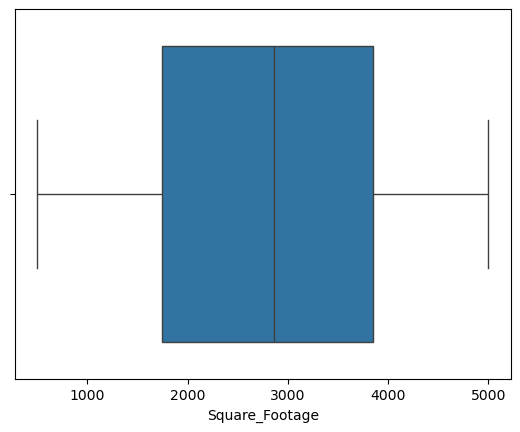

In [7]:
sns.boxplot(dataset,x='Square_Footage')

Para manejar los outliers se utilizará la técnica de IQR o rango intercuantílico

In [8]:

q1=dataset.quantile(.25)
q3=dataset.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
dataset=dataset[(dataset>LowerBound)&(dataset<UpperBound)]



In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Como se puede observar, no hubo instancias fuera del rango. Por lo tanto, no hay outliers

## 2. Selección de Características
Mapa de calor de la matriz de correlación de pearson:

<Axes: >

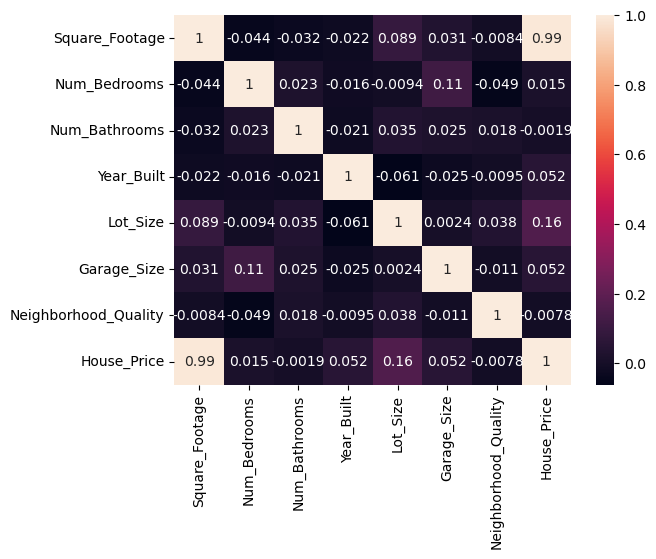

In [10]:
sns.heatmap(dataset.corr('pearson'),annot=True)

Mapa de calor de la matriz de correlación de spearman:

<Axes: >

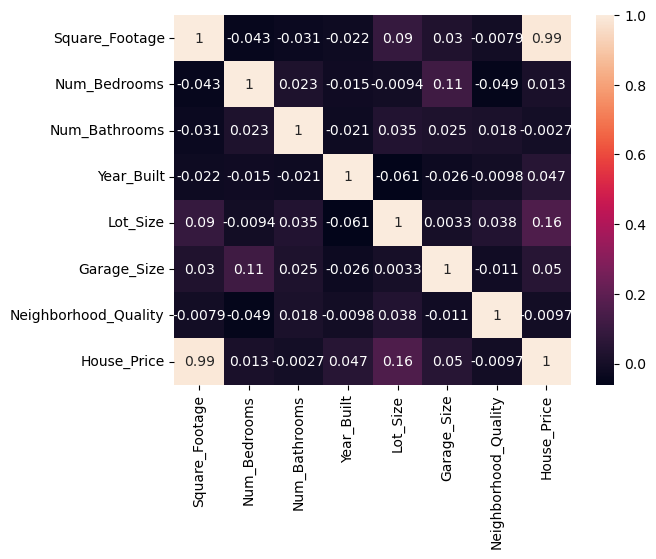

In [11]:
sns.heatmap(dataset.corr('spearman'),annot=True)

Como se puede observar, las variables con mayor correlación con el precio de la casa son los pies cuadrados, el año de construcción, el tamaño del lote y el tamaño del garaje. Todos estos datos alcanzan una correlación mayor a 0.05, por lo tanto se utilizarán para entrenar un modelo. También se hará un modelo con el tamaño del lote y los pies cuadrados únicamente. Que son los únicos 2 con correlación > 0.1.

## 3. Normalización de los datos


In [ ]:
# Normalizacion de los datos
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

## 4. Creación de un dataframe


In [ ]:
columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
            'Year_Built', 'Lot_Size', 'Garage_Size', 
            'Neighborhood_Quality', 'House_Price']

dataset = pd.DataFrame(data=dataset, columns=columns)
dataset.head(2)

## 5. Division de los datos
La división de datos se hace con random sampling, haciendo un shuffle de los datos.

#### División de dataset con todos los features

In [ ]:
X = dataset.drop(["House_Price"], axis=1)
y = dataset["House_Price"]

# se dividen los sets (70% - 15% - 15%)

# Divide en entrenamiento (70%) y el resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)



#### División de dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje

In [ ]:
X1 = dataset.drop(["House_Price", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"], axis=1)
y1 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X1_train, X_temp, y1_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X1_val, X1_test, y1_val, y1_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados y tamaño del lote

In [ ]:
X2 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality"], axis=1)
y2 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X2_train, X_temp, y2_train, y_temp = train_test_split(X2, y2, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X2_val, X2_test, y2_val, y2_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

## 6. Entrenamiento
### Implementación de Regresión Lineal

In [17]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

#### Cálculo de error

In [18]:
def MSE(y, output):
    return (output-y)**2

#### Funciones para Actualización de Parámetros

In [19]:
def derivada_L_w(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto W
    output = wx+b
    '''
    return 2*x*(output - y)

In [20]:
def derivada_L_b(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto b
    output = wx+b
    '''
    return 2*(output-y)

### Funciones de Graficación
#### Función de Gráfico de MSE

In [21]:
def plotMSE(historial_mse_epochs):
    # Puntos de cada MSE
    epochs, mses = zip(*historial_mse_epochs)

    # Graficar la recta generada por el modelo
    plt.scatter(epochs, mses, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'Curva de Error | Epoch {max(epochs)}')
    plt.grid(True)
    plt.show()

### Training

In [23]:
def generar_params_iniciales(*dimensiones_w):
    w = np.random.rand(*dimensiones_w)
    b = np.random.default_rng().random()
    return w, b

In [24]:
def entrenar(training_dataset, training_labels, validation_dataset, validation_labels, epochs = 400, alfa = 0.005, plot_cada_n=-1):
    w, b = generar_params_iniciales(*training_dataset.columns.shape)

    print(f"Valores iniciales:, B = {b:.5F}, W =", w)

    historial_error_epochs = []

    # Época
    for epoch in range(epochs):
        errores_por_instancia = []
        derivadas_w = []
        derivadas_b = []
        for (x, y) in zip(training_dataset.values, training_labels):
            # Correr el modelo por cada instancia y calcular su error y funcion de pérdida
            output = modelo(x, w, b)
            error = MSE(y, output)
            errores_por_instancia.append(error)
            derivada_w = derivada_L_w(x, y, output)
            derivadas_w.append(derivada_w)
            derivada_b = derivada_L_b(x, y, output)
            derivadas_b.append(derivada_b)

        # Cálculo de Promedios
        promedio_dw = np.mean(derivadas_w, axis=0)
        promedio_db = np.mean(derivadas_b)
        promedio_error = np.mean(errores_por_instancia)

        historial_error_epochs.append((epoch, promedio_error))

        # Actualización de Parámetros
        w = w - alfa*promedio_dw
        b = b - alfa*promedio_db

        if (plot_cada_n > 0 and epoch != 0 and epoch % plot_cada_n == 0):
            print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {promedio_error:.5F}, B = {b:.5F}, W =", w)
            plotMSE(historial_error_epochs)

        # TODO: VALIDACION

    return w, b


## Testing

In [25]:
def testear(w, b, testing_dataset, testing_labels, ):
    #TODO: Esto hay que cambiarlo, por métricas de Loss y Accuracy
    errores_por_instancia = []
    for (x, y) in zip(testing_dataset.values, testing_labels):
        output = modelo(x, w, b)
        error = MSE(output, y)
        errores_por_instancia.append(error)

    promedio_error = np.mean(errores_por_instancia)
    
    print(f"Valor de función de perdida (Loss Function) para testing = {promedio_error:.5F}")


# Ejecuciones:
## Correr training con todos los features: Epochs 400 y Alfa: 0.00000003

Valores iniciales:, B = 0.61502, W = [0.89944819 0.30119938 0.44633885 0.86380342 0.5593498  0.3822498
 0.39434363]
Epoca 50, valor de función de perdida (Loss Function) = 1.04116, B = 0.33488, W = [0.93947573 0.16352642 0.25300084 0.4807898  0.37397489 0.22692736
 0.20980762]


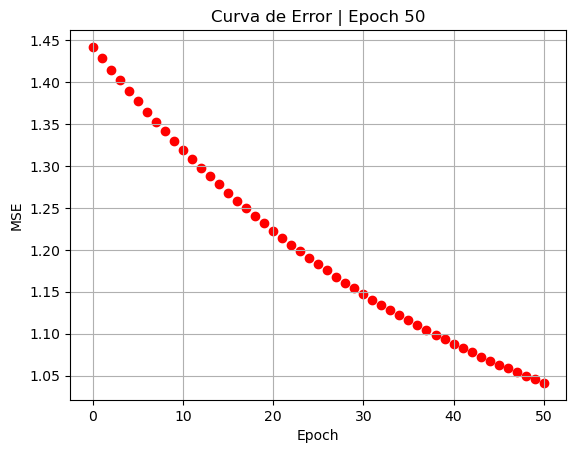

Epoca 100, valor de función de perdida (Loss Function) = 0.92149, B = 0.18586, W = [0.96139366 0.08935105 0.14794197 0.27622496 0.2760512  0.14664152
 0.11403856]


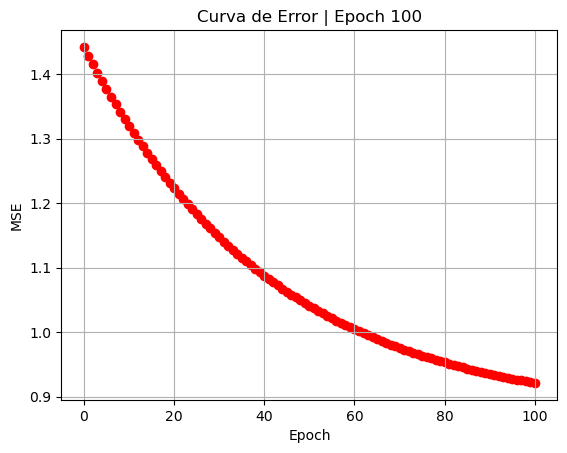

Epoca 150, valor de función de perdida (Loss Function) = 0.88578, B = 0.10445, W = [0.97369879 0.0483296  0.08936338 0.16404361 0.22293234 0.10406279
 0.06301821]


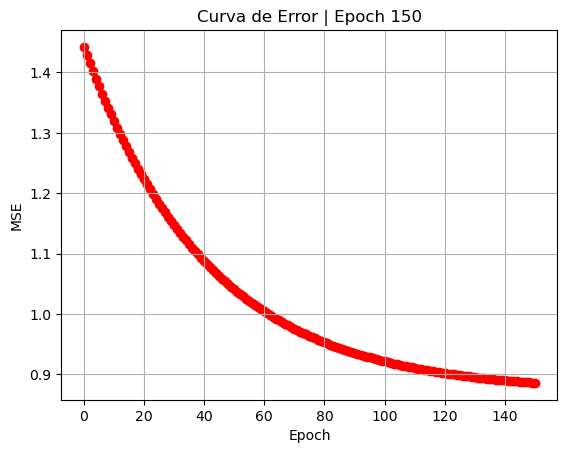

Epoca 200, valor de función de perdida (Loss Function) = 0.87512, B = 0.05997, W = [0.98059982 0.02564769 0.05671488 0.1025243  0.19411819 0.08150889
 0.03585354]


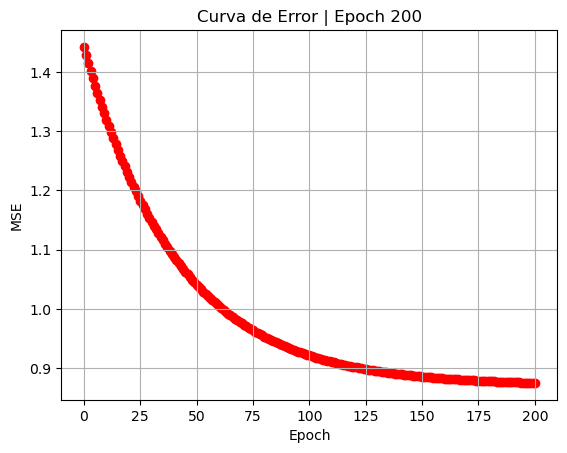

Epoca 250, valor de función de perdida (Loss Function) = 0.87194, B = 0.03567, W = [0.98446627 0.01310852 0.03852567 0.06878752 0.17848821 0.06957769
 0.02139935]


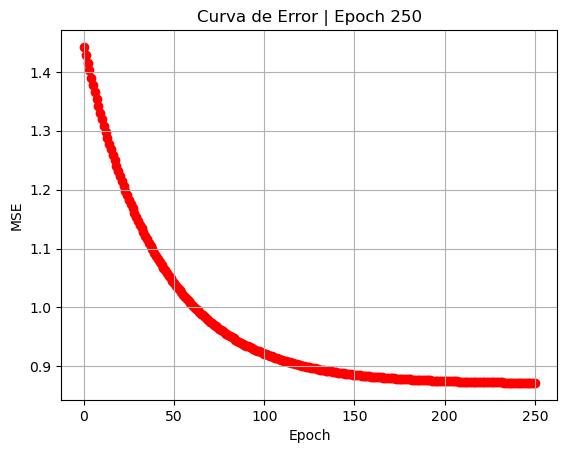

Epoca 300, valor de función de perdida (Loss Function) = 0.87099, B = 0.02238, W = [0.98663053 0.00617776 0.02839591 0.05028645 0.17000995 0.06327488
 0.01371342]


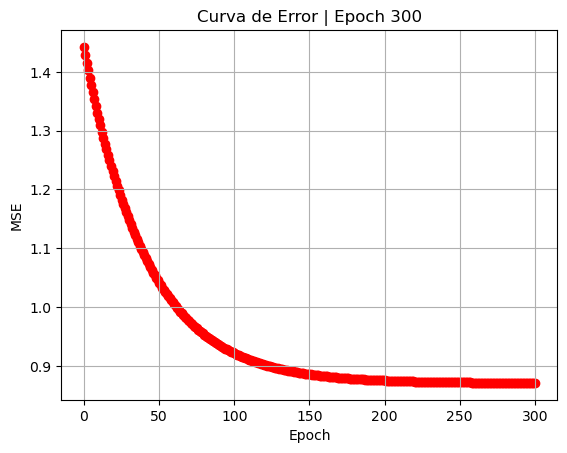

Epoca 350, valor de función de perdida (Loss Function) = 0.87070, B = 0.01513, W = [0.98784095 0.00234757 0.02275661 0.04014053 0.16541108 0.05995042
 0.00962934]


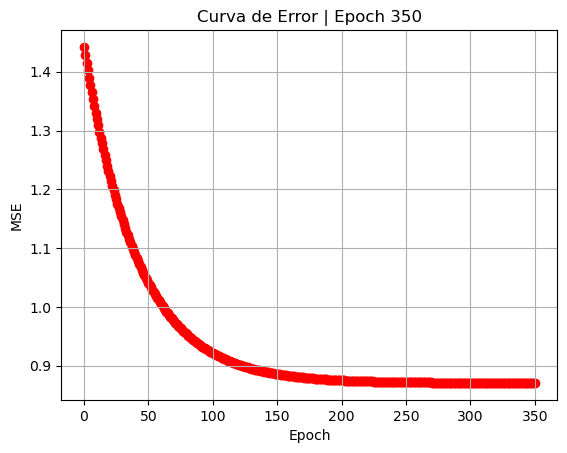

In [26]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.006, plot_cada_n=50)
# testear(w, b, X_test, y_test)

###

## Correr training con selección de features #1: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.01105, W = [0.80903082 0.16952523 0.940961   0.33608417]
Epoca 50, valor de función de perdida (Loss Function) = 0.81546, B = 0.00752, W = [0.89328747 0.10465946 0.57903047 0.2087517 ]


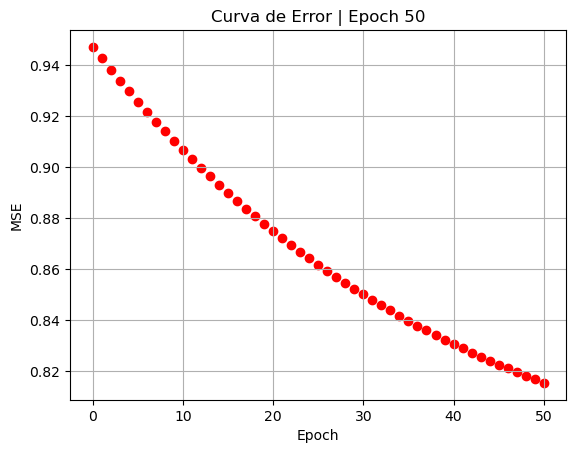

Epoca 100, valor de función de perdida (Loss Function) = 0.77654, B = 0.00598, W = [0.93754778 0.06999002 0.38758767 0.14037668]


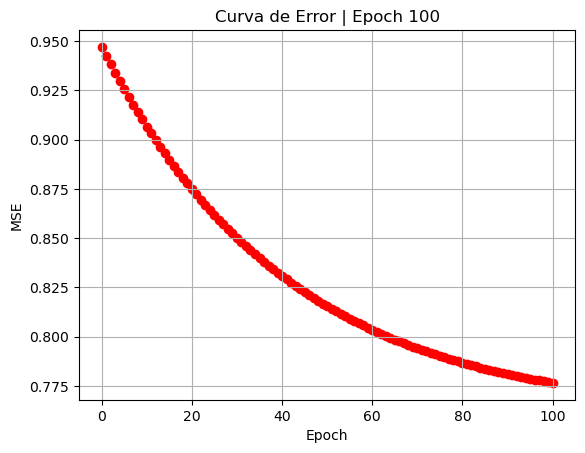

Epoca 150, valor de función de perdida (Loss Function) = 0.76502, B = 0.00533, W = [0.96142385 0.05096388 0.28360166 0.1026762 ]


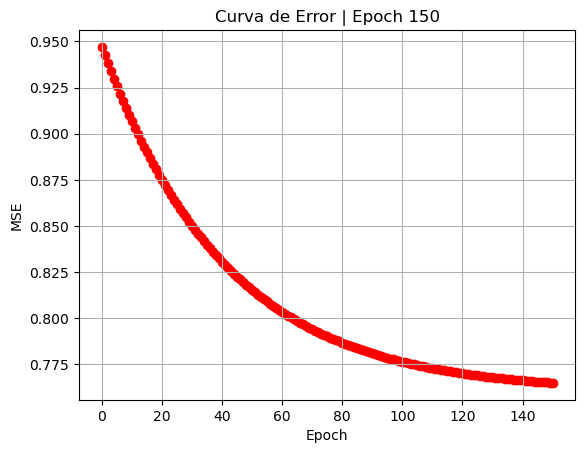

Epoca 200, valor de función de perdida (Loss Function) = 0.76161, B = 0.00508, W = [0.97430313 0.04052248 0.22711947 0.08188675]


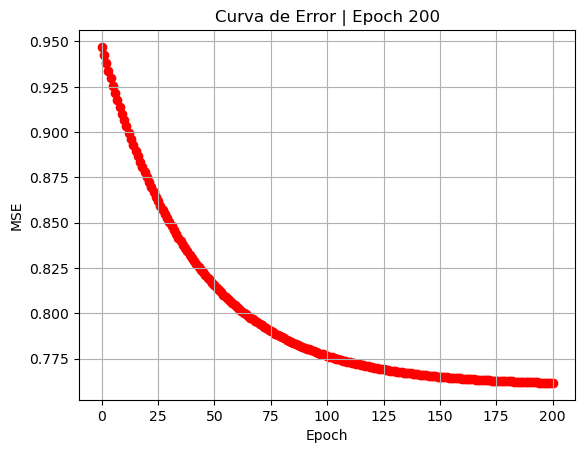

Epoca 250, valor de función de perdida (Loss Function) = 0.76060, B = 0.00500, W = [0.98125018 0.03479225 0.19643994 0.07042145]


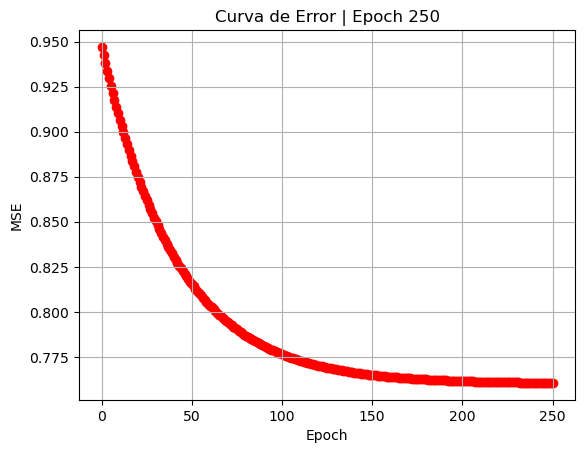

Epoca 300, valor de función de perdida (Loss Function) = 0.76030, B = 0.00498, W = [0.98499722 0.03164748 0.17977565 0.06409771]


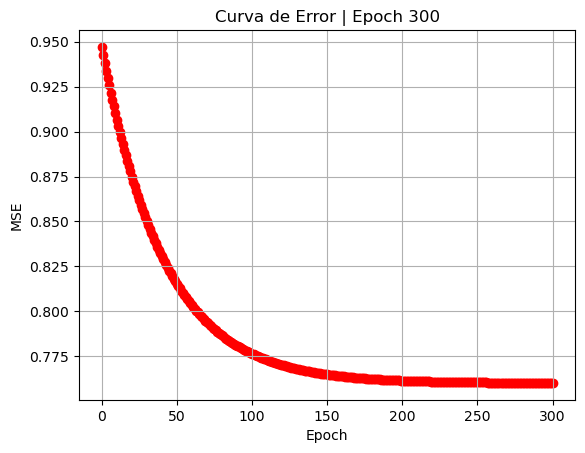

Epoca 350, valor de función de perdida (Loss Function) = 0.76022, B = 0.00500, W = [0.98701816 0.0299216  0.17072405 0.06060945]


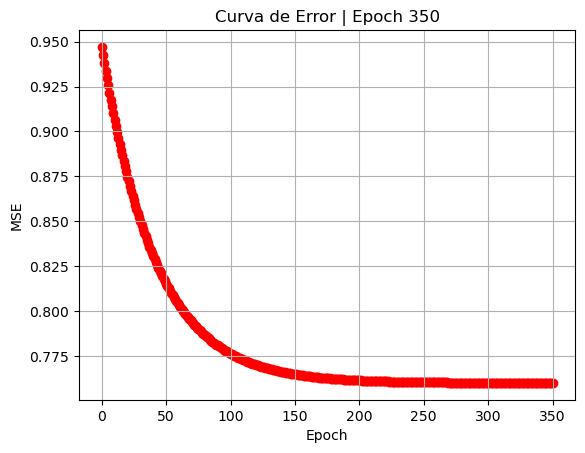

In [27]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.006, plot_cada_n=50)
#testear(w, b, X1_test, y1_test)

## Correr training con selección de features #2: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.60706, W = [0.93717504 0.04340008]
Epoca 50, valor de función de perdida (Loss Function) = 0.64093, B = 0.36493, W = [0.95665905 0.09027646]


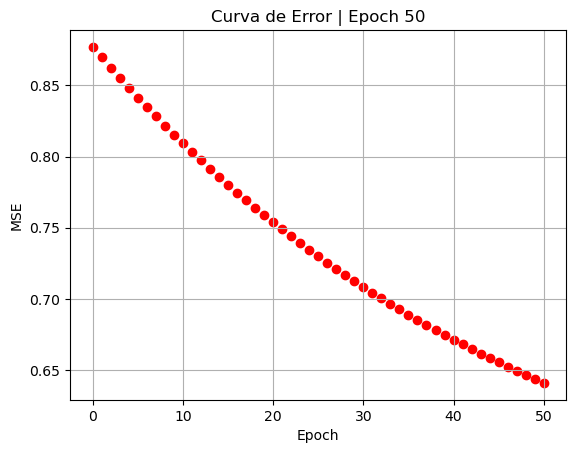

Epoca 100, valor de función de perdida (Loss Function) = 0.55443, B = 0.22206, W = [0.96873535 0.11787877]


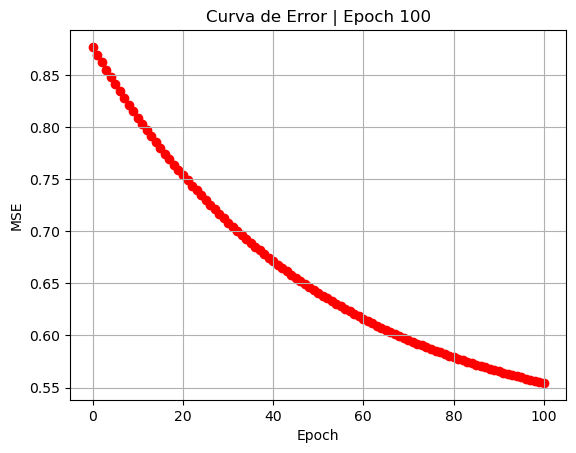

Epoca 150, valor de función de perdida (Loss Function) = 0.52274, B = 0.13560, W = [0.97638593 0.13454801]


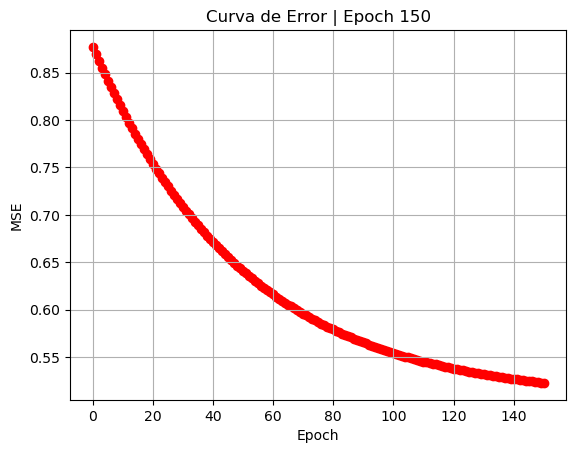

Epoca 200, valor de función de perdida (Loss Function) = 0.51113, B = 0.08327, W = [0.98122061 0.14461478]


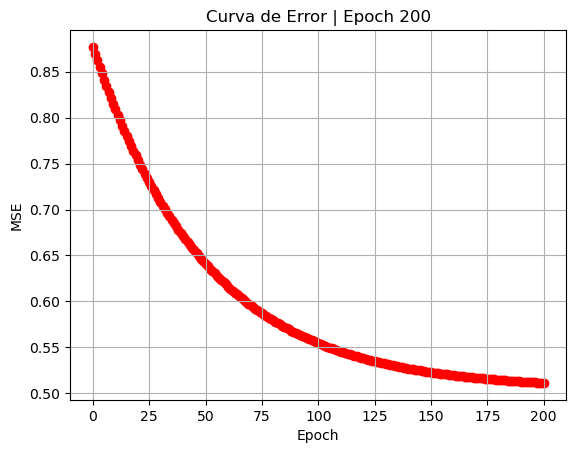

Epoca 250, valor de función de perdida (Loss Function) = 0.50687, B = 0.05160, W = [0.9842689  0.15069427]


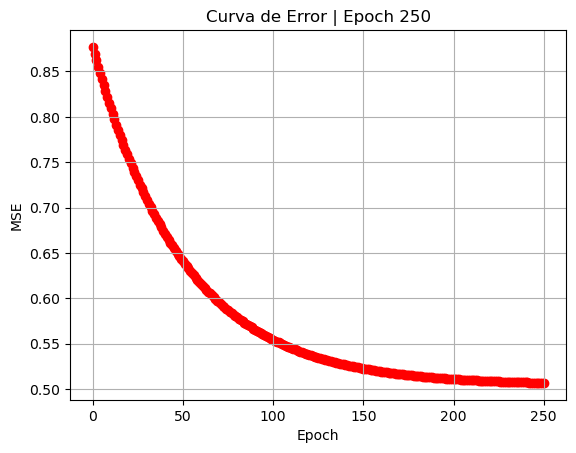

Epoca 300, valor de función de perdida (Loss Function) = 0.50531, B = 0.03244, W = [0.9861869  0.15436581]


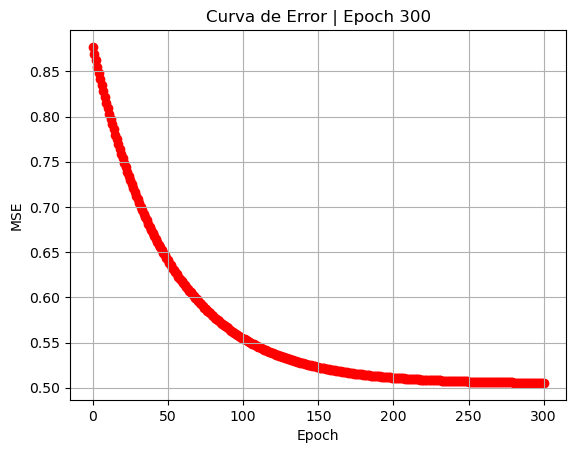

Epoca 350, valor de función de perdida (Loss Function) = 0.50474, B = 0.02084, W = [0.98739145 0.15658315]


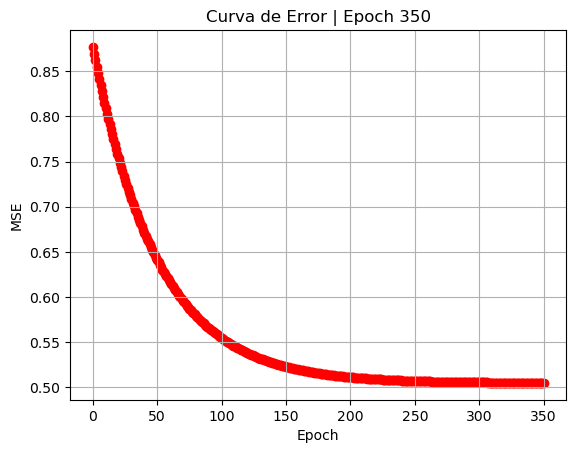

Valor de función de perdida (Loss Function) para testing = 0.47298


In [29]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=400, alfa=0.005, plot_cada_n=50)
testear(w, b, X2_test, y2_test)